**Name** : Neha Gode
**UID** : 2021300039
**Class** : BE COMPS



Practicing on Sample Data Set:

https://learn.microsoft.com/en-us/power-bi/create-reports/desktop-dimensional-model-report?source=recommendations



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file_path = '/content/AdventureWorks Sales.xlsx'
sales_territory_data = pd.read_excel(file_path, sheet_name='Sales Territory_data')

<ipython-input-5-02e8de5f897c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales_territory_data, x='Region', palette='viridis')


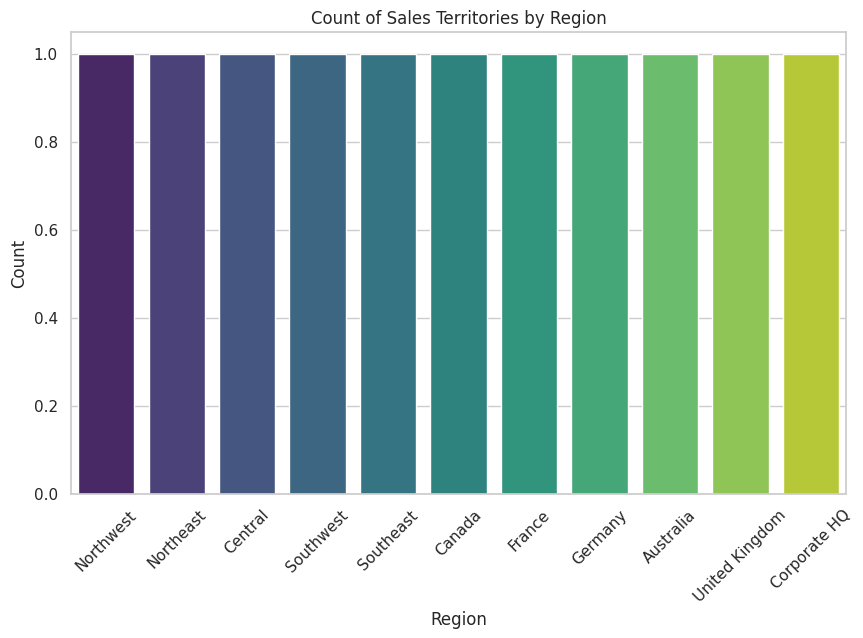

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_territory_data, x='Region', palette='viridis')
plt.title('Count of Sales Territories by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

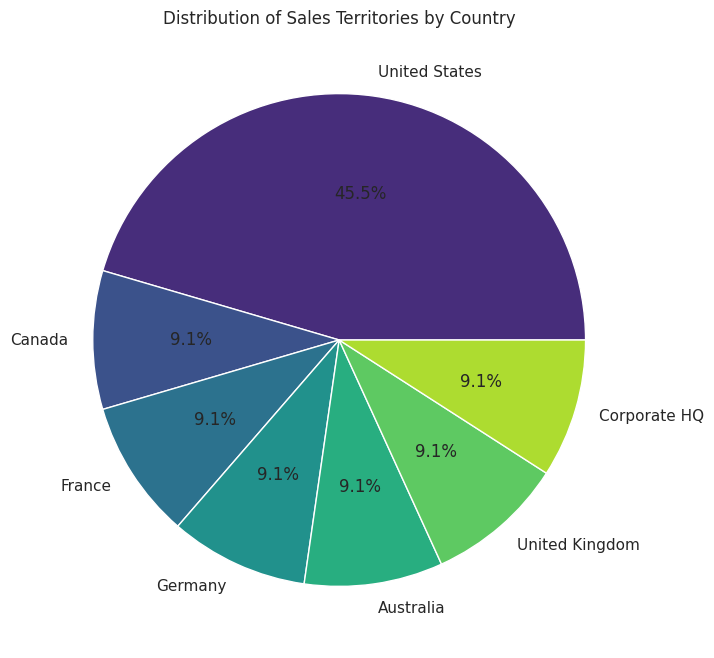

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 8))
country_counts = sales_territory_data['Country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(country_counts)))
plt.title('Distribution of Sales Territories by Country')
plt.show()

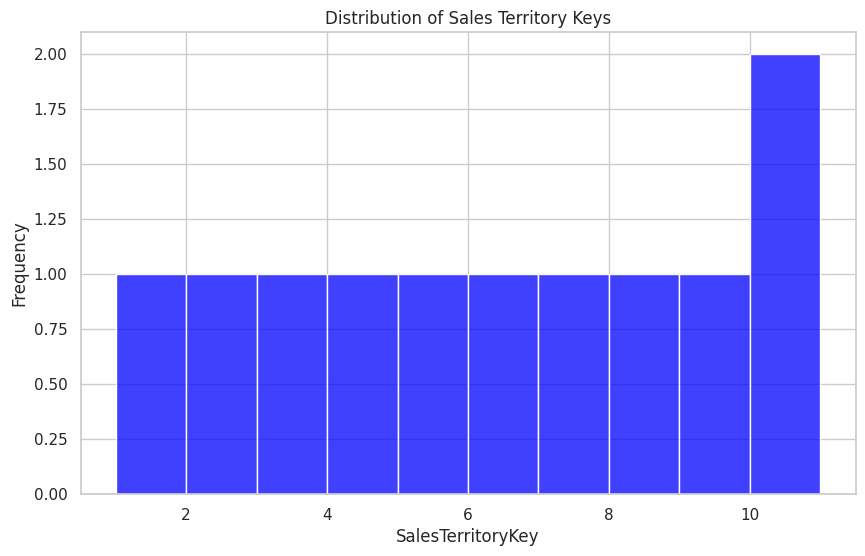

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(sales_territory_data['SalesTerritoryKey'], bins=10, kde=False, color='blue')
plt.title('Distribution of Sales Territory Keys')
plt.xlabel('SalesTerritoryKey')
plt.ylabel('Frequency')
plt.show()

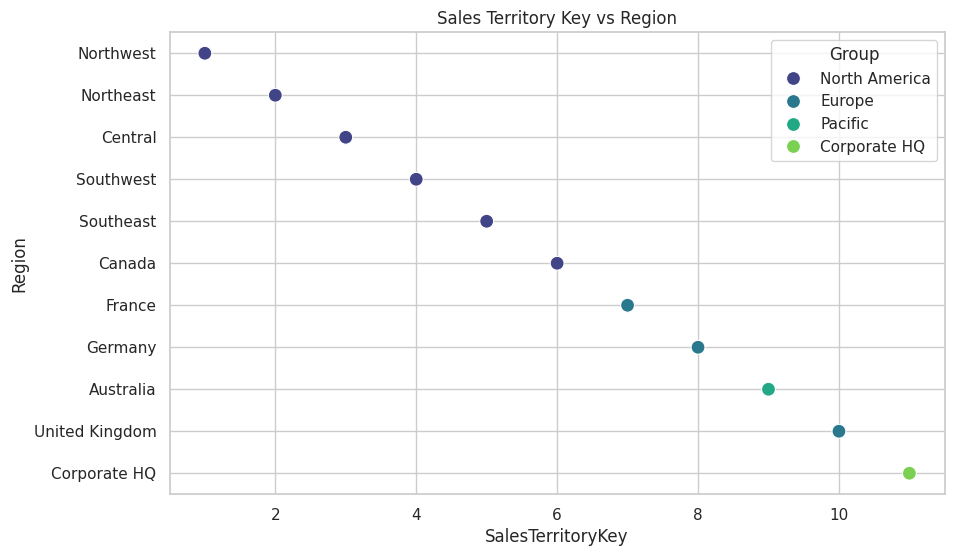

In [ ]:
# Scatter Plot (Note: This is more illustrative since Region is categorical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SalesTerritoryKey', y='Region', data=sales_territory_data, hue='Group', palette='viridis', s=100)
plt.title('Sales Territory Key vs Region')
plt.xlabel('SalesTerritoryKey')
plt.ylabel('Region')
plt.show()

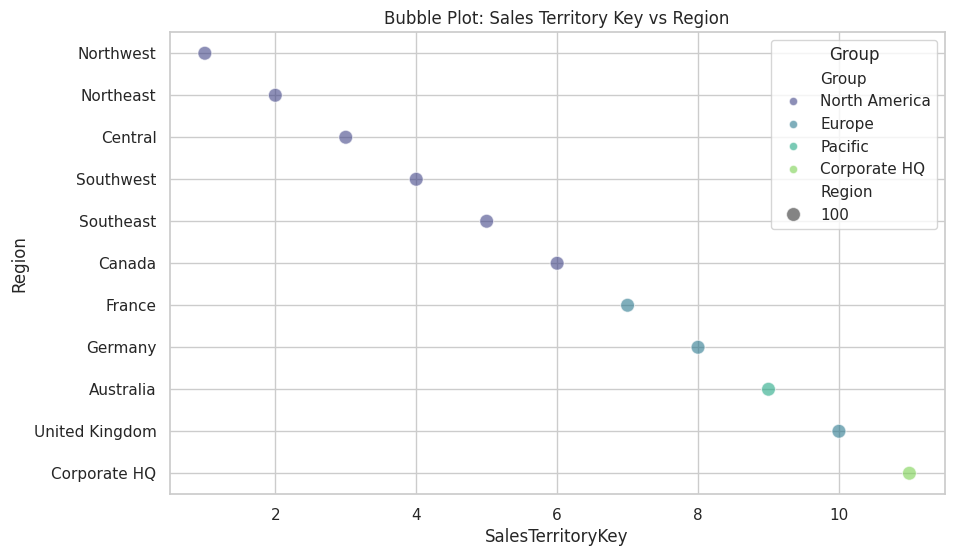

In [ ]:
# Bubble Plot: Sales Territory Key vs Region, with Bubble Size by Frequency
plt.figure(figsize=(10, 6))

# Calculate the size of the bubbles based on the frequency of occurrences
bubble_sizes = sales_territory_data['Region'].map(sales_territory_data['Region'].value_counts()) * 100

sns.scatterplot(x='SalesTerritoryKey', y='Region', data=sales_territory_data,
                size=bubble_sizes, sizes=(100, 1000), hue='Group', alpha=0.6, palette='viridis')
plt.title('Bubble Plot: Sales Territory Key vs Region')
plt.xlabel('SalesTerritoryKey')
plt.ylabel('Region')
plt.legend(title='Group')
plt.show()

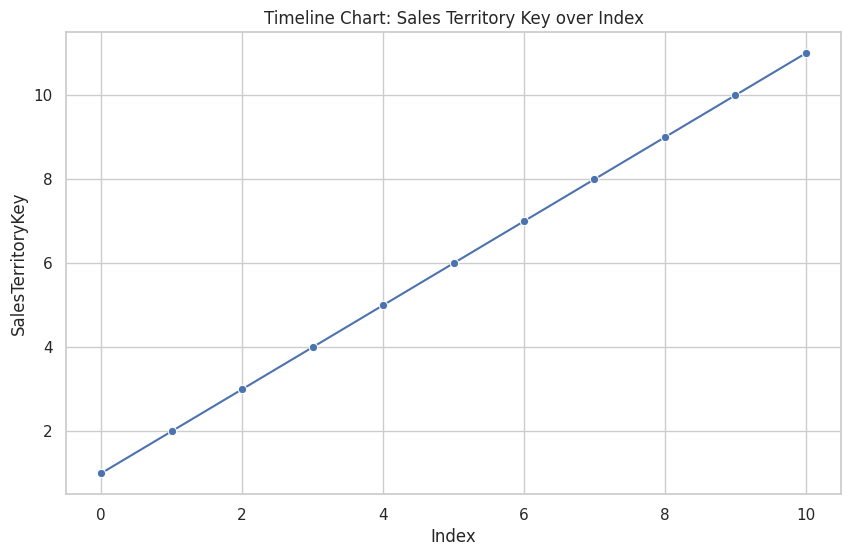

In [ ]:
# Create a timeline based on the index (as a placeholder for time)
sales_territory_data['Index'] = sales_territory_data.index

# Timeline Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Index', y='SalesTerritoryKey', data=sales_territory_data, marker='o')
plt.title('Timeline Chart: Sales Territory Key over Index')
plt.xlabel('Index')
plt.ylabel('SalesTerritoryKey')
plt.show()

Using an Ecommerce Data Set:

https://www.kaggle.com/datasets/benroshan/ecommerce-data/code

# Dataset
You can view the dataset from this link: [E-commerce Dataset](https://www.kaggle.com/datasets/benroshan/ecommerce-data/code)
# Description
This dataset provides a snapshot of various health and socio-economic indicators for countries around the world in 2001.  It includes key metrics such as life expectancy, prevalence of undernourishment, CO2 emissions, health expenditure, education expenditure, unemployment rate, corruption perception, sanitation access, and mortality rates from injuries, communicable diseases, and non-communicable diseases. This data allows for analysis of relationships between these factors and comparisons across different regions and income groups.
# Metadata
Metadata for List of Orders

| Column Name |	Description | Data Type |
|---|---|---|
| Order ID | Unique identifier for the order |	Text |
| Order Date|	Date when the order was placed	| Date |
|Customer Name|	Name of the customer|	Text|
|State	|State where the order was placed|	Categorical|
|City	|City where the order was placed	|Text|


Metadata for Order Details

| Column Name |	Description | Data Type |
|---|---|---|
| Order ID	|Unique identifier for the order|	Text|
Amount|	Total amount of the order|	Numeric
Profit|	Profit or loss from the order|	Numeric
Quantity|	Quantity of items in the order|	Numeric
Category|	Category of the product|	Categorical
Sub-Category|	Sub-category of the product|	Categorical

In [ ]:
demo = pd.read_csv("/content/List of Orders.csv", encoding='utf-8')
order_details = pd.read_csv("/content/Order Details.csv", encoding='utf-8')

In [ ]:
demo.rename(columns={'Order ID':'ID', 'Order Date':'Date'}, inplace=True)
order_details.rename(columns={'Order ID':'ID', 'Sub-Category':'Sub_Category'}, inplace=True)

In [ ]:
order_details.head()

,ID,Amount,Profit,Quantity,Category,Sub_Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [ ]:
demo.head()

,ID,Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


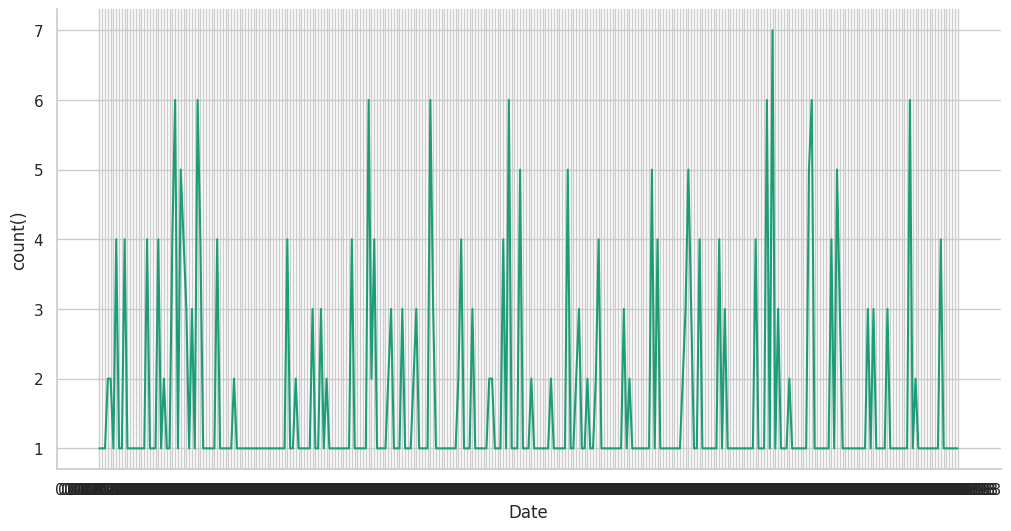

In [ ]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = demo.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

##Orders Placed Over Time
There seems to be a significant fluctuation in the number of orders placed on different dates. The count of orders per day varies widely, with some dates having as few as 1 order and others having up to 6 or 7 orders.
There is no clear pattern or regularity in the number of orders placed over time, indicating that orders might be sporadic or influenced by external factors like promotions, holidays, or seasonal demand.

In [ ]:
demo_missing_percent = demo.isnull().sum() / demo.shape[0] * 100
print(demo_missing_percent)
order_details_missing_percent = order_details.isnull().sum() / order_details.shape[0] * 100
print(order_details_missing_percent)
demo.rename(columns={'Order Date': 'OrderDate'}, inplace=True)
demo.rename(columns={'Order ID': 'OrderID'}, inplace=True)


ID              10.714286
Date            10.714286
CustomerName    10.714286
State           10.714286
City            10.714286
dtype: float64
ID              0.0
Amount          0.0
Profit          0.0
Quantity        0.0
Category        0.0
Sub_Category    0.0
dtype: float64


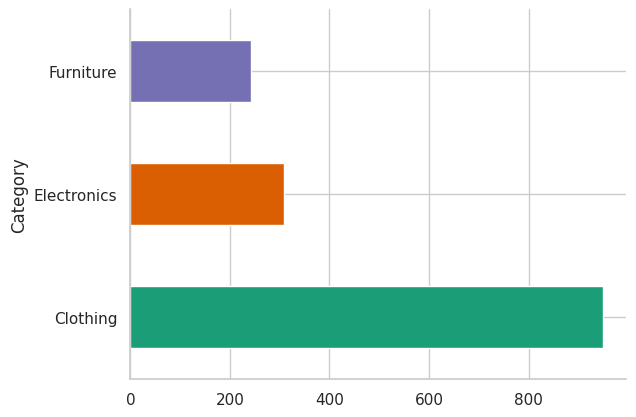

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
order_details.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Category Distribution
The majority of the orders belong to the "Clothing" category, indicating it’s the most popular or most frequently ordered category among the available categories.Electronics is the second most popular category, followed by Furniture. This indicates that Clothing has a significantly higher demand compared to the other two categories.

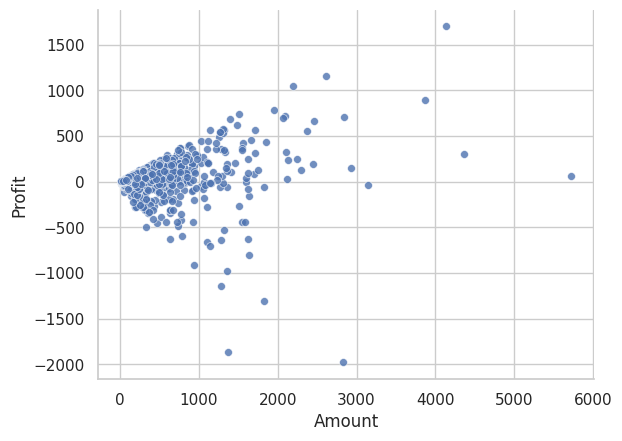

In [ ]:
# @title Amount vs Profit
sns.scatterplot(data=order_details, x='Amount', y='Profit', s=32, alpha=0.8)

# Hide the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

A large cluster of data points is observed where the order amount is below 1000 and the profit is close to zero, indicating that a majority of orders are smaller in amount with marginal profit or loss.

In [ ]:
# Merge DataFrames on 'ID'
merged_df = pd.merge(order_details, demo, on='ID')
merged_df.head()

,ID,Amount,Profit,Quantity,Category,Sub_Category,Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


###Bubble Plot

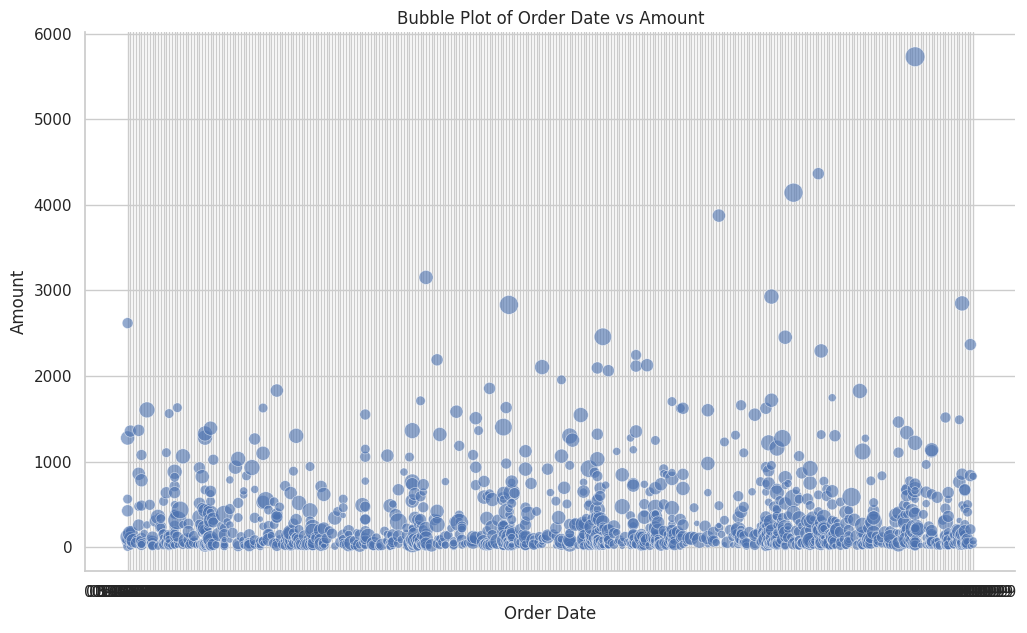

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.scatterplot(data=merged_df, x='Date', y='Amount', size='Quantity', sizes=(20, 200), alpha=0.6, legend=None)

# Hide the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.title('Bubble Plot of Order Date vs Amount')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.show()

##Bubble Plot of Order Date vs Amount:

This plot visualizes the relationship between the order date and the amount. The size of the bubbles represents the quantity of orders.
The majority of orders have amounts clustered below 1000, but there are a few outliers with significantly higher amounts.

###TimeLine Plot

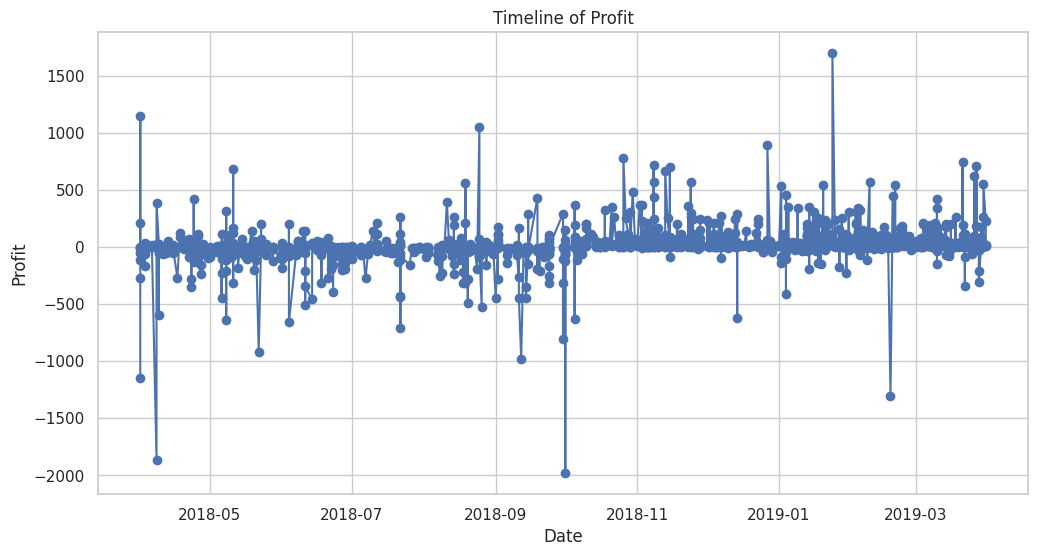

In [ ]:
sns.set(style="whitegrid")

#Convert 'Date' into datetimeformat
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')

# Create a line plot for Profit over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Profit'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Timeline of Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)

# Show the plot
plt.show()

##Timeline of Profit
This line plot shows the profit over time, with spikes and dips indicating periods of high and low profitability.
The frequent fluctuations suggest a volatile market or operational environment.
Notable peaks and troughs indicate significant profit or loss events that could be tied to specific business activities or external factors.

###Pie Chart

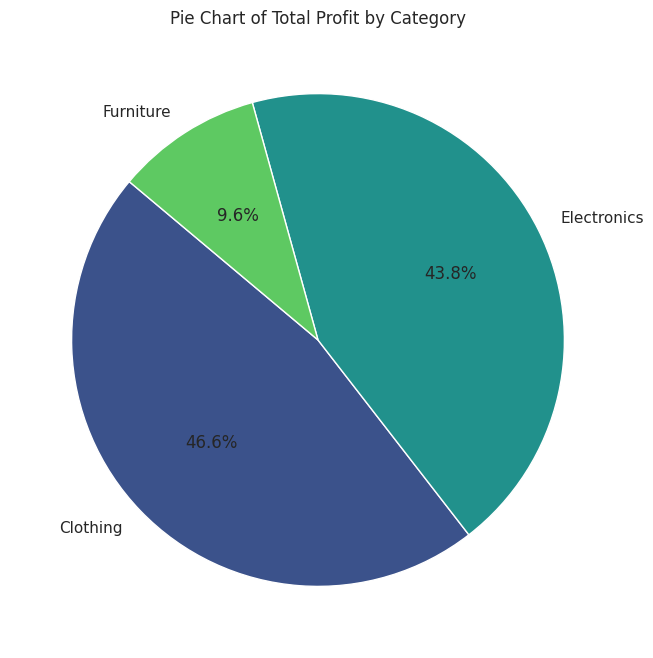

In [ ]:
sns.set(style="whitegrid")
category_profit = order_details.groupby('Category')['Profit'].sum()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(category_profit, labels=category_profit.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(category_profit)))

# Add a title
plt.title('Pie Chart of Total Profit by Category')

# Show the plot
plt.show()

The pie chart breaks down total profits by product category.
Clothing is the most profitable category, contributing 46.6% of the total profit.
Electronics follow closely with 43.8%, while Furniture lags behind at 9.6%.
This distribution indicates that Clothing and Electronics are key revenue drivers, with Furniture having a relatively smaller impact on the overall profit.

##Calculating Product Wise Sales

      Category    Amount
0     Clothing  139054.0
1  Electronics  165267.0
2    Furniture  127181.0


<ipython-input-25-fdde3f70b9f1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='Category', y='Amount', palette='viridis')


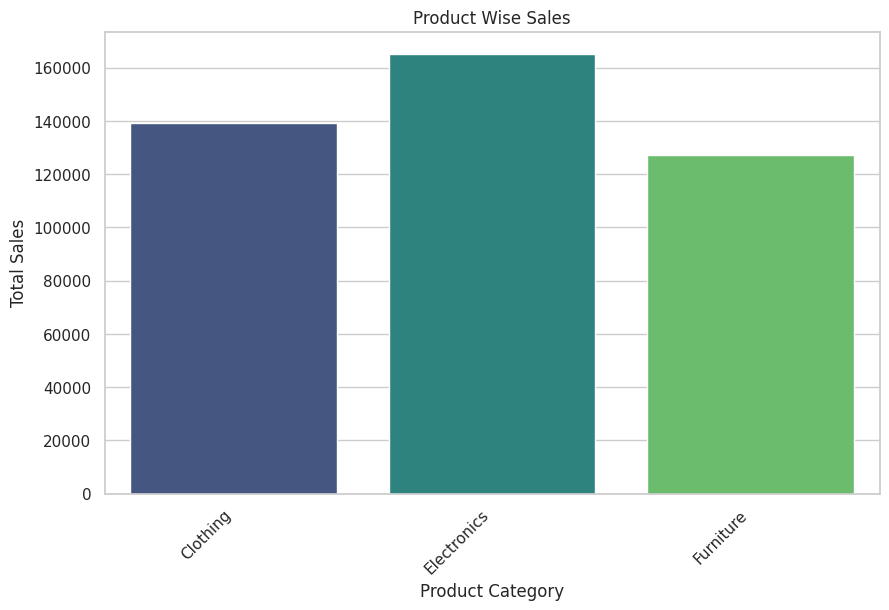

In [ ]:
product_sales = merged_df.groupby('Category')['Amount'].sum().reset_index()

# Display the product-wise sales
print(product_sales)

# Plot the product-wise sales
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales, x='Category', y='Amount', palette='viridis')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Product Wise Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

##Calculating Region Wise Sales

                State    Amount
0      Andhra Pradesh   13256.0
1               Bihar   12943.0
2               Delhi   22531.0
3                 Goa    6705.0
4             Gujarat   21058.0
5             Haryana    8863.0
6    Himachal Pradesh    8666.0
7   Jammu and Kashmir   10829.0
8           Karnataka   15058.0
9             Kerala    13459.0
10     Madhya Pradesh  105140.0
11        Maharashtra   95348.0
12           Nagaland   11903.0
13             Punjab   16786.0
14          Rajasthan   21149.0
15             Sikkim    5276.0
16         Tamil Nadu    6087.0
17      Uttar Pradesh   22359.0
18        West Bengal   14086.0


<ipython-input-26-6db743ab2f52>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='State', y='Amount', palette='coolwarm')


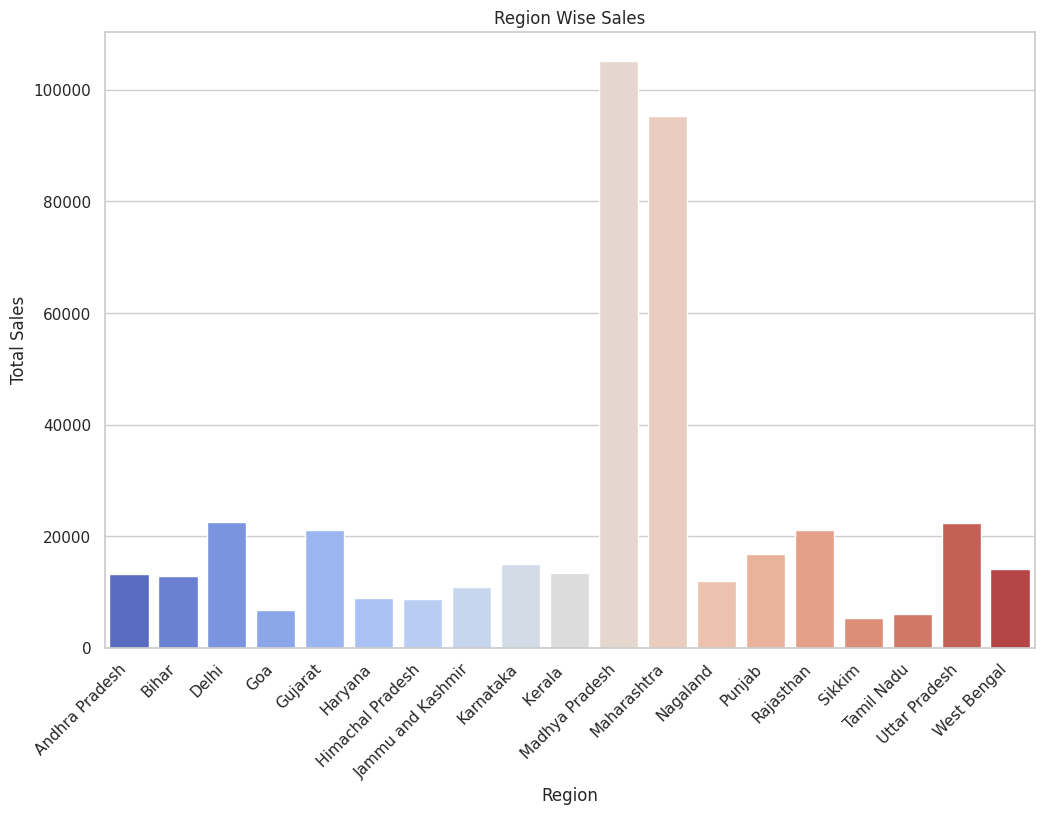

In [ ]:
region_sales = merged_df.groupby('State')['Amount'].sum().reset_index()

# Display the region-wise sales
print(region_sales)

# Plot the region-wise sales
plt.figure(figsize=(12, 8))
sns.barplot(data=region_sales, x='State', y='Amount', palette='coolwarm')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Region Wise Sales')
plt.xticks(rotation=45, ha='right')
plt.show()